# Chapter 7. Eigenvalue and Eigenvector

## 7.1. Unitary matrices and Hermitian matrices

[Untitled.ipynb](./7.1/Untitled.ipynb)

In [1]:
import numpy as np
import sympy as sp
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [2]:
sp.diag(1, 2, 3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

## 7.2

**Program:** [prob1.py](./7.2/prob1.py) / [prob1.ipynb](./7.2/prob1.ipynb)

In [1]:
from sympy import Matrix
from numpy.random import choice, seed

N = [-3, -2, -1, 1, 2, 3]
seed(2021)

def f(truth):
    while True:
        A = Matrix(choice(N, (2, 2)))
        eigenvals= A.eigenvals()
        if len(eigenvals) == 2 and not 0 in eigenvals:
            if all([x.is_real for x in eigenvals]) == truth:
                print(eigenvals)
                return A

In [2]:
f(True)

{3 - sqrt(2): 1, sqrt(2) + 3: 1}


Matrix([
[3, 2],
[1, 3]])

In [3]:
f(False)

{5/2 - sqrt(35)*I/2: 1, 5/2 + sqrt(35)*I/2: 1}


Matrix([
[ 3, 3],
[-3, 2]])

---
[Untitled.py](./7.2/Untitled.py) / [Untitled.ipynb](./7.2/Untitled.ipynb)

In [1]:
from sympy import *
A = Matrix([[3, -4, 2], [2, -3, 2], [3, -6, 4]])
f = det(A - var('lmd') * eye(3)); f

-lmd**3 + 4*lmd**2 - 5*lmd + 2

In [2]:
expand(f)

-lmd**3 + 4*lmd**2 - 5*lmd + 2

In [3]:
factor(f)

-(lmd - 2)*(lmd - 1)**2

In [4]:
v = Matrix([var('x'), var('y'), var('z')]); v

Matrix([
[x],
[y],
[z]])

In [5]:
w = Lambda(lmd, (A - lmd * eye(3)) * v); w

Lambda(lmd, Matrix([
[ x*(3 - lmd) - 4*y + 2*z],
[2*x + y*(-lmd - 3) + 2*z],
[ 3*x - 6*y + z*(4 - lmd)]]))

In [6]:
ans = solve(w(1)); ans

{x: 2*y - z}

In [7]:
v.subs(ans)

Matrix([
[2*y - z],
[      y],
[      z]])

In [8]:
ans = solve(w(2)); ans

{x: 2*z/3, y: 2*z/3}

In [9]:
A.eigenvals()

{2: 1, 1: 2}

In [10]:
A.eigenvects()

[(1,
  2,
  [Matrix([
   [2],
   [1],
   [0]]),
   Matrix([
   [-1],
   [ 0],
   [ 1]])]),
 (2,
  1,
  [Matrix([
   [2/3],
   [2/3],
   [  1]])])]

---
[Untitled1.py](./7.2/Untitled1.py) / [Untitled1.ipynb](./7.2/Untitled1.ipynb)

In [1]:
from numpy.linalg import eig, norm
A = [[3, -2, 2], [2, -1, 4], [2, -2, 1]]
lmd, vec = eig(A)
lmd

array([1.+0.j, 1.+2.j, 1.-2.j])

In [2]:
vec[:, 0]

array([ 7.07106781e-01+0.j,  7.07106781e-01+0.j, -3.65101269e-16+0.j])

In [3]:
vec[:, 1]

array([-0.47434165-0.15811388j, -0.79056942+0.j        ,
       -0.15811388-0.31622777j])

In [4]:
vec[:, 2]

array([-0.47434165+0.15811388j, -0.79056942-0.j        ,
       -0.15811388+0.31622777j])

In [5]:
[norm(vec[:, n]) for n in range(3)]

[1.0, 0.9999999999999997, 0.9999999999999997]

---
**Program:** [eig1.py](./7.2/eig1.py) / [eig1.ipynb](./7.2/eig1.ipynb)

In [1]:
import sympy as sp

A = [[1, 1], [0, 1]]
a = sp.Matrix(A).eigenvects()
print(f'''eigen value: {a[0][0]}
multiplicity: {a[0][1]}
eigen vector:
{a[0][2][0]}''')

eigen value: 1
multiplicity: 2
eigen vector:
Matrix([[1], [0]])


---
**Program:** [eig2.py](./7.2/eig2.py) / [eig2.ipynb](./7.2/eig2.ipynb)

In [1]:
import numpy as np

A = [[1, 1], [0, 1]]
b = np.linalg.eig(A)
print(f'''eigen values: {b[0][0]}, {b[0][1]}
eigen vectors:
{b[1][:, 0]}
{b[1][:, 1]}''')

eigen values: 1.0, 1.0
eigen vectors:
[1. 0.]
[-1.00000000e+00  2.22044605e-16]


**Program:** [prob2.py](./7.2/prob2.py) / [prob2.ipynb](./7.2/prob2.ipynb)

In [1]:
from sympy import Matrix, Symbol, factor_list, factor
from numpy.random import choice, seed

seed(2021)
D = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]

def f():
    while True:
        A = Matrix(choice(D, (3, 3)))
        cp = A.charpoly(Symbol('lmd'))
        F = factor_list(cp)
        if len(F[1]) == 3:
            print(f'det(A - lmd*I) = {factor(cp.expr)}\nA = {A}')
            return A

In [2]:
f()

det(A - lmd*I) = lmd*(lmd - 2)*(lmd + 4)
A = Matrix([[5, -5, -1], [3, -2, -2], [4, -1, -5]])


Matrix([
[5, -5, -1],
[3, -2, -2],
[4, -1, -5]])

## 7.3. Diagonalization

**Program:** [prob2.py](./7.3/prob2.py) / [prob2.ipynb](./7.3/prob2.ipynb)

In [1]:
from sympy import Matrix, Symbol, factor_list, factor
from numpy.random import choice, seed

seed(2021)
D = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]

def f():
    while True:
        A = Matrix(choice(D, (3, 3)))
        cp = A.charpoly(Symbol('lmd'))
        F = factor_list(cp.expr)
        if len(F[1]) == 3:
            print(f'det(A - lmd*I) = {factor(cp.expr)}\nA = {A}')
            return A

In [2]:
A = f()

det(A - lmd*I) = lmd*(lmd - 2)*(lmd + 4)
A = Matrix([[5, -5, -1], [3, -2, -2], [4, -1, -5]])


In [3]:
X = A.eigenvects()

In [4]:
u, v, w = [e for x in X for e in x[2]]

In [5]:
V = u.row_join(v).row_join(w); V

Matrix([
[4/11, 8/5, 2],
[5/11, 7/5, 1],
[   1,   1, 1]])

In [6]:
V**(-1) * A * V

Matrix([
[-4, 0, 0],
[ 0, 0, 0],
[ 0, 0, 2]])

---
[Untitled.ipynb](./7.3/Untitled.ipynb)

In [1]:
from sympy import *
from sympy.abc import a, b, c, d
A = Matrix([[a, b], [c, d]])
solve(A.T * A - A * A.T)

[{b: c}, {b: -c, a: d}, {b: 0, c: 0}]

---
[Untitled1.ipynb](./7.3/Untitled1.ipynb)

In [1]:
from sympy import *
A = Matrix([[I, I], [-I, I]])
A * A.H - A.H * A

Matrix([
[0, 0],
[0, 0]])

In [2]:
X = A.eigenvects();X

[(-1 + I,
  1,
  [Matrix([
   [-I],
   [ 1]])]),
 (1 + I,
  1,
  [Matrix([
   [I],
   [1]])])]

In [3]:
B = [v / v.norm() for x in X for v in x[2]]
U = B[0].row_join(B[1]); U

Matrix([
[-sqrt(2)*I/2, sqrt(2)*I/2],
[   sqrt(2)/2,   sqrt(2)/2]])

In [4]:
simplify(U.H * A * U)

Matrix([
[-1 + I,     0],
[     0, 1 + I]])

In [5]:
A.diagonalize()

(Matrix([
 [-I, I],
 [ 1, 1]]),
 Matrix([
 [-1 + I,     0],
 [     0, 1 + I]]))

---
[Untitled2.ipynb](./7.3/Untitled2.ipynb)

In [1]:
from sympy import *
A = Matrix([[0, 1, 2], [1, 2, 0], [2, 0, 1]])
X = A.eigenvects()
[x[0] for x in X]

[3, -sqrt(3), sqrt(3)]

In [2]:
B = [simplify(v) for x in X for v in x[2]]
C = [simplify(b / b.norm()) for b in B]
U = C[0].row_join(C[1]).row_join(C[2]); U

Matrix([
[sqrt(3)/3, -1/2 - sqrt(3)/6,  1/2 - sqrt(3)/6],
[sqrt(3)/3,  1/2 - sqrt(3)/6, -1/2 - sqrt(3)/6],
[sqrt(3)/3,        sqrt(3)/3,        sqrt(3)/3]])

In [3]:
simplify(U.T * A * U)

Matrix([
[3,        0,       0],
[0, -sqrt(3),       0],
[0,        0, sqrt(3)]])

---
[Untitled3.ipynb](./7.3/Untitled3.ipynb)

In [1]:
from numpy import *
A = array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
Lmd, V = linalg.eig(A); Lmd

array([ 9.62347538e+00, -6.23475383e-01,  1.78970268e-16])

In [2]:
linalg.inv(V).dot(A.dot(V))

array([[ 9.62347538e+00, -2.98311220e-15,  3.92073229e-16],
       [-4.74862708e-16, -6.23475383e-01,  1.87877276e-17],
       [ 1.19870029e-15,  2.70032142e-16,  7.70371978e-32]])

In [3]:
B = array([[1j, 1j], [-1j, 1j]])
Lmd, V = linalg.eigh(B); Lmd

array([-1.,  1.])

---
**Program:** [prob3.py](./7.3/prob3.py) / [prob3.ipynb](./7.3/prob3.ipynb)

In [1]:
from sympy import Matrix
from numpy.random import choice, seed

seed(2021)
N = [-3, -2, -1, 1, 2, 3]


def g(symmetric=True):
    if symmetric:
        a, b, d = choice(N, 3)
        return Matrix([[a, b], [b, d]])
    else:
        a, b = choice(N, 2)
        return Matrix([[a, b], [-b, a]])

In [2]:
g()

Matrix([
[2,  3],
[3, -2]])

In [3]:
g(False)

Matrix([
[-3,  3],
[-3, -3]])

## 7.4. Matrix norm and matrix functions

**Program:** [unitcircle2.py](./7.4/unitcircle2.py)

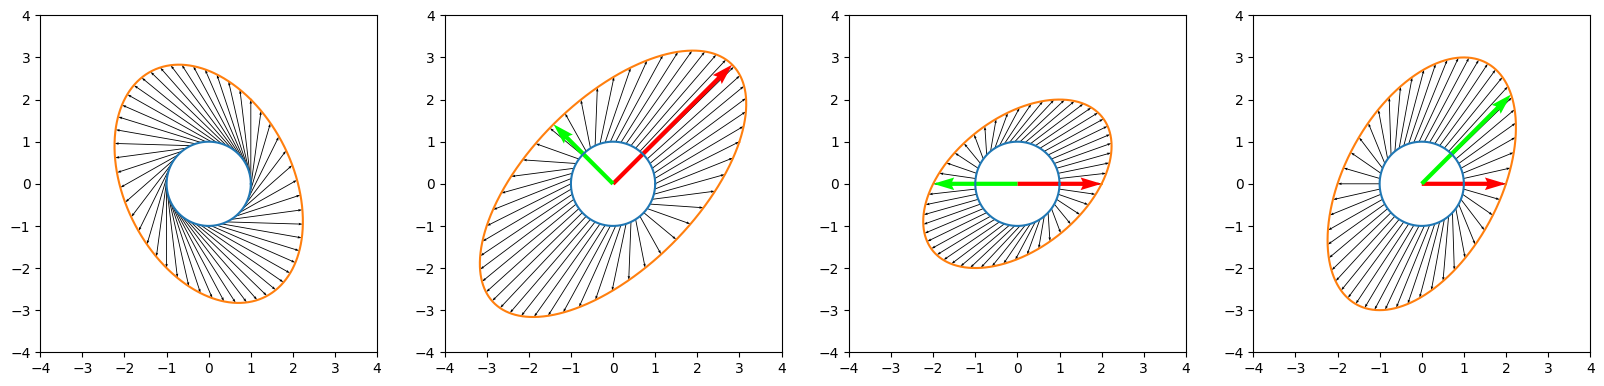

In [1]:
from numpy import array, arange, pi, sin, cos, isreal
from numpy.linalg import eig, norm
import matplotlib.pyplot as plt


def arrow(p, v, c=(0, 0, 0), w=0.02):
    plt.quiver(p[0], p[1], v[0], v[1], units='xy', scale=1,
               color=c, width=w)


AA = [array([[1, -2], [2, 2]]),
      array([[3, 1], [1, 3]]),
      array([[2, 1], [0, 2]]),
      array([[2, 1], [0, 3]])]
T = arange(0, 2 * pi, pi / 500)
U = array([(cos(t), sin(t)) for t in T])
o = array([0, 0])
n = 140
plt.figure(figsize=(20, 5))
for A in AA:
    n += 1
    plt.subplot(n)
    V = array([A.dot(u) for u in U])
    plt.plot(U[:, 0], U[:, 1])
    plt.axis('scaled'), plt.xlim(-4, 4), plt.ylim(-4, 4)
    plt.plot(V[:, 0], V[:, 1])
    for u, v in zip(U[::20], V[::20]):
        arrow(u, v - u)
    Lmd, Vec = eig(A)
    if isreal(Lmd[0]):
        arrow(o, Lmd[0] * Vec[:, 0], c=(1, 0, 0), w=0.1)
    if isreal(Lmd[1]):
        arrow(o, Lmd[1] * Vec[:, 1], c=(0, 1, 0), w=0.1)

---
**Program:** [matrixnorm.py](./7.4/matrixnorm.py)

In [1]:
from numpy import array, arange, pi, sin, cos
from numpy.linalg import eig, norm

M = [array([[1, 2], [2, 1]]),
     array([[1, 2], [-2, 1]]),
     array([[1, 2], [3, 4]])]
T = arange(0, 2 * pi, pi / 500)
U = array([(cos(t), sin(t)) for t in T])
for A in M:
    r1 = max([abs((A.dot(u)).dot(u)) for u in U])
    r2 = max([abs(e) for e in eig(A)[0]])
    r3 = max([norm(A.dot(u)) for u in U])
    print(f'{A}: num={r1:.2f}, spec={r2:.2f}, norm={r3:.2f}')

[[1 2]
 [2 1]]: num=3.00, spec=3.00, norm=3.00
[[ 1  2]
 [-2  1]]: num=1.00, spec=2.24, norm=2.24
[[1 2]
 [3 4]]: num=5.42, spec=5.37, norm=5.46


---
**Program:** [exp_np.py](./7.4/exp_np.py) / [exp_np.ipynb](./7.4/exp_np.ipynb)

In [1]:
from numpy import matrix, e, exp, diag
from numpy.linalg import eigh

A = matrix([[1, 2], [2, 1]])
m, B = 1, 0
for n in range(10):
    B += A ** n / m
    m *= n + 1
print(B)

a = eigh(A)
S, V = diag(e**a[0]), a[1] 
print(V * S * V.H)

print(exp(A))

[[10.21563602  9.84775683]
 [ 9.84775683 10.21563602]]
[[10.22670818  9.85882874]
 [ 9.85882874 10.22670818]]
[[2.71828183 7.3890561 ]
 [7.3890561  2.71828183]]


---
**Program:** [exp_sp.py](./7.4/exp_sp.py) / [exp_sp.ipynb](./7.4/exp_sp.ipynb)

In [1]:
from sympy import Matrix, exp, var
var('n')

A = Matrix([[1, 2], [2, 1]])
print(A**n)
print(exp(A))

Matrix([[(-1)**n/2 + 3**n/2, -(-1)**n/2 + 3**n/2], [-(-1)**n/2 + 3**n/2, (-1)**n/2 + 3**n/2]])
Matrix([[exp(-1)/2 + exp(3)/2, -exp(-1)/2 + exp(3)/2], [-exp(-1)/2 + exp(3)/2, exp(-1)/2 + exp(3)/2]])
